In [1]:
using JLD2
using Plots
using DelimitedFiles
using Random
using StatsBase
using Plots.PlotMeasures

In [2]:
pwd()

"/Users/joshua/Desktop/QuantumInspiredMLFinal/QuantumInspiredML/FinalBenchmarks/NASA_KeplerV2"

In [3]:
f = jldopen("../../Data/NASA_KeplerV2/datasets/KeplerLightCurveOrig.jld2");
X_train = read(f, "X_train")
X_test = read(f, "X_test")
y_train = read(f, "y_train")
y_test = read(f, "y_test");

In [4]:
class_tr_idxs = [findall(x -> x .== class, y_train) for class in 0:6]
class_te_idxs = [findall(x -> x .== class, y_test) for class in 0:6];

In [5]:
class_tr_idxs[1][1]

1

# Class 2 (3) (Delta Scuti Var) vs Class 4 (5) (Non-Variable)

Check the number of instances for each class

In [6]:
delta_scuti_train_idxs, delta_scuti_test_idxs = class_tr_idxs[3], class_te_idxs[3];
rot_var_train_idxs, rot_var_test_idxs = class_tr_idxs[5], class_te_idxs[5];


In [7]:
println(length(delta_scuti_train_idxs))
println(length(delta_scuti_test_idxs))
println(length(rot_var_train_idxs))
println(length(rot_var_test_idxs))

287
124
140
61


Window each time series instance.

In [8]:
function make_windows(ts::Vector{Float64}, window_size::Int, stride::Int)
    n = length(ts)
    windows = [ts[i:i+window_size-1] for i in 1:stride:n-window_size+1]
    return windows
end

function detect_flat_regions(data)
    flat_regions = []
    for i in 2:length(data)
        if data[i] == data[i-1]
            push!(flat_regions, i)
        end
    end
    return flat_regions
end

detect_flat_regions (generic function with 1 method)

In [10]:
samp = X_train[delta_scuti_train_idxs[2], :]

4767-element Vector{Float64}:
  1.80973820580466e-5
 -4.22017514206674e-5
  1.44876603872524e-5
  6.86631434265728e-6
  2.15108426440125e-5
 -1.82617238188021e-5
  1.57035102498204e-5
 -1.42192201736391e-5
  6.97259212545376e-6
 -3.50287916291991e-5
  ⋮
 -1.5866728569125e-5
 -1.68445669007644e-5
 -3.29104029017646e-6
  1.2914732628877e-5
 -3.87098678944486e-6
 -3.15874284254614e-5
  8.11234960595986e-6
  2.45080112194485e-5
 -3.3003598399195e-5

In [11]:
windows = make_windows(samp, 100, 100);

In [12]:
corrupted_idxs = findall(length.(detect_flat_regions.(windows)) .> 25)

2-element Vector{Int64}:
 33
 39

Keeping the original train/test splits

In [9]:
X_train_delta_scuti = X_train[delta_scuti_train_idxs, :];
X_test_delta_scuti = X_test[delta_scuti_test_idxs, :];
X_train_rotvar = X_train[rot_var_train_idxs, :]
X_test_rotvar = X_test[rot_var_test_idxs, :];

In [10]:
X_train_orig = vcat(X_train_delta_scuti, X_train_rotvar)
X_test_orig = vcat(X_test_delta_scuti, X_test_rotvar);
y_train_orig = vcat(zeros(Int64, size(X_train_delta_scuti, 1)), ones(Int64, size(X_train_rotvar, 1)));
y_test_orig = vcat(zeros(Int64, size(X_test_delta_scuti, 1)), ones(Int64, size(X_test_rotvar, 1)));

In [65]:
cpal = palette(:tab10)

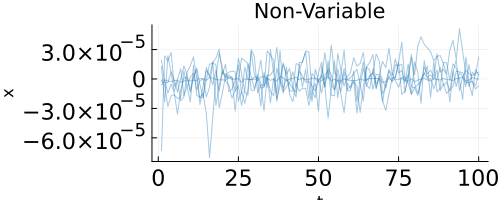

In [96]:
fstyle = font("sans-serif", 15)
plot(X_train_rotvar[rand(1:size(X_train_rotvar, 1)),1:100], label="", xlabel="t", ylabel="x",
    xtickfont=fstyle, ytickfont=fstyle, guidefontstyle=fstyle,
    yformatter = :scientific,
    size=(500, 200), alpha=0.4, c=cpal[1], title="Non-Variable")
plot!(X_train_rotvar[rand(1:size(X_train_rotvar, 1)),1:100], label="", alpha=0.4, c=cpal[1])
plot!(X_train_rotvar[rand(1:size(X_train_rotvar, 1)),1:100], label="", alpha=0.4, c=cpal[1])
plot!(X_train_rotvar[rand(1:size(X_train_rotvar, 1)),1:100], label="", alpha=0.4, c=cpal[1])
plot!(X_train_rotvar[rand(1:size(X_train_rotvar, 1)),1:100], label="", alpha=0.4, c=cpal[1])
plot!(X_train_rotvar[rand(1:size(X_train_rotvar, 1)),1:100], label="", alpha=0.4, c=cpal[1])
#savefig("non_var_examples.svg")

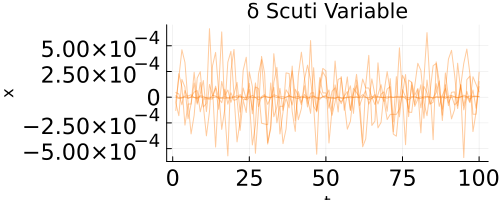

In [105]:
fstyle = font("sans-serif", 15)
plot(X_train_delta_scuti[rand(1:size(X_train_delta_scuti, 1)),1:100], label="", xlabel="t", ylabel="x",
    xtickfont=fstyle, ytickfont=fstyle, guidefontstyle=fstyle,
    yformatter = :scientific,
    size=(500, 200), alpha=0.4, c=cpal[2], title="δ Scuti Variable")
plot!(X_train_delta_scuti[rand(1:size(X_train_rotvar, 1)),1:100], label="", alpha=0.4, c=cpal[2])
plot!(X_train_delta_scuti[rand(1:size(X_train_rotvar, 1)),1:100], label="", alpha=0.4, c=cpal[2])
plot!(X_train_delta_scuti[rand(1:size(X_train_rotvar, 1)),1:100], label="", alpha=0.4, c=cpal[2])
plot!(X_train_delta_scuti[rand(1:size(X_train_rotvar, 1)),1:100], label="", alpha=0.4, c=cpal[2])
plot!(X_train_delta_scuti[rand(1:size(X_train_rotvar, 1)),1:100], label="", alpha=0.4, c=cpal[2])
#savefig("delta_scuti_examples.svg")

In [107]:
#savefig("delta_scuti_examples.svg")

In [173]:
# jldopen("/Users/joshua/Desktop/QuantumInspiredMLFinal/QuantumInspiredML/Data/NASA_KeplerV2/datasets/KeplerBinaryOrigUnbal.jld2", "w") do f
#     f["X_train"] = X_train_orig
#     f["y_train"] = y_train_orig
#     f["X_test"] = X_test_orig
#     f["y_test"] = y_test_orig
# end;

In [15]:
X_delta_scuti = vcat(X_train_delta_scuti, X_test_delta_scuti)
X_rotvar = vcat(X_train_rotvar, X_test_rotvar);

In [16]:
println(size(X_delta_scuti, 1))
println(size(X_rotvar, 1))

411
201


Making a balanced version...

In [17]:
Random.seed!(42)
X_delta_scuti_subset_idxs = sample(1:size(X_delta_scuti, 1), 201; replace=false);
X_delta_scuti_subset = X_delta_scuti[X_delta_scuti_subset_idxs, :];

Split into 80/20 train/test

In [18]:
X_bal = vcat(X_delta_scuti_subset, X_rotvar)
y_bal = vcat(zeros(Int64, size(X_delta_scuti_subset, 1)), ones(Int64, size(X_rotvar, 1)));

In [19]:
Random.seed!(0)
train_idxs = sample(1:size(X_bal, 1), 321; replace=false);
test_idxs = setdiff(1:size(X_bal, 1), train_idxs);

In [20]:
X_train_bal = X_bal[train_idxs, :];
X_test_bal = X_bal[test_idxs, :];
y_train_bal = y_bal[train_idxs]
y_test_bal = y_bal[test_idxs];

In [21]:
jldopen("/Users/joshua/Desktop/QuantumInspiredMLFinal/QuantumInspiredML/Data/NASA_KeplerV2/datasets/KeplerBinaryOrigBal.jld2", "w") do f
    f["X_train"] = X_train_bal
    f["y_train"] = y_train_bal
    f["X_test"] = X_test_bal
    f["y_test"] = y_test_bal
end;